In [15]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [16]:
# Load and preprocess the data (Step 2)
data_dir = './asl_alphabet_train/asl_alphabet_train/'  # Update to your dataset path
categories = os.listdir(data_dir)
labels = {cat: i for i, cat in enumerate(categories)}


In [1]:
# Specifying the training and test directories

TRAINING_DIR = './asl_alphabet_train/asl_alphabet_train/'
TEST_DIR = './asl_alphabet_test/asl_alphabet_test/'

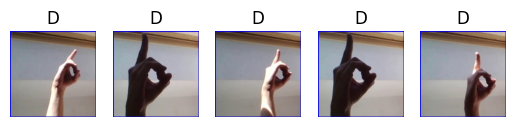

In [4]:
# Printing 5 random images from any training category or from a specified category
%matplotlib inline

import cv2
import os
import random
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

number_of_rows = 1
number_of_columns = 5

categories = os.listdir(TRAINING_DIR)

random.seed(13)

category = categories[random.randint(1, 4)]
# category = 'A'

for i in range(number_of_columns):
  subplot = plt.subplot(number_of_rows, number_of_columns, i + 1)
  subplot.axis('Off')
  subplot.set_title(category)
  image_path = os.path.join(
      TRAINING_DIR,
      str(category),
      str(category) + str(random.randint(1, 1000)) + '.jpg'
  )
  image = mpimg.imread(image_path)
  plt.imshow(image)
  
plt.show()

In [17]:
data = []
target = []

for category in categories:
    path = os.path.join(data_dir, category)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (64, 64))  # Resize to a common size
        data.append(img)
        target.append(labels[category])

data = np.array(data) / 255.0  # Normalize pixel values
target = np.array(target)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [19]:
# Build the CNN Model (Step 3)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [20]:
# Train the Model (Step 4)
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
658/658 [==============================] - 19s 12ms/step - loss: 0.9380 - accuracy: 0.6553 - val_loss: 0.2621 - val_accuracy: 0.9319
Epoch 2/10
658/658 [==============================] - 27s 41ms/step - loss: 0.2826 - accuracy: 0.9021 - val_loss: 0.1027 - val_accuracy: 0.9741
Epoch 3/10
658/658 [==============================] - 22s 34ms/step - loss: 0.1601 - accuracy: 0.9448 - val_loss: 0.0609 - val_accuracy: 0.9857
Epoch 4/10
658/658 [==============================] - 22s 34ms/step - loss: 0.1199 - accuracy: 0.9604 - val_loss: 0.0345 - val_accuracy: 0.9933
Epoch 5/10
658/658 [==============================] - 22s 34ms/step - loss: 0.0991 - accuracy: 0.9668 - val_loss: 0.0239 - val_accuracy: 0.9949
Epoch 6/10
658/658 [==============================] - 22s 34ms/step - loss: 0.0732 - accuracy: 0.9756 - val_loss: 0.0179 - val_accuracy: 0.9952
Epoch 7/10
658/658 [==============================] - 22s 34ms/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 0.0252 - val_accuracy:

In [21]:
# Test the Model (Step 5)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")


165/165 - 2s - loss: 0.0116 - accuracy: 0.9968 - 2s/epoch - 11ms/step
Test accuracy: 99.68%


In [22]:
# Make Predictions (Step 6)
def predict_sign_language(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    img = np.array([img]) / 255.0
    prediction = model.predict(img)
    predicted_category = categories[np.argmax(prediction)]
    return predicted_category


In [9]:
import os

# Path to the folder containing test images of letters A to Z
test_folder_path = './asl_alphabet_test/asl_alphabet_test' # Update to your test folder path

# Function to predict sign language gestures for all images in a folder
def predict_sign_language_for_folder(folder_path):
    predictions = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):  # Ensure we only process image files
            image_path = os.path.join(folder_path, filename)
            predicted_sign = predict_sign_language(image_path)
            predictions.append((image_path, predicted_sign))

    return predictions

# Make predictions for all images in the test folder
folder_predictions = predict_sign_language_for_folder(test_folder_path)

# Print the predictions for each image
for image_path, predicted_sign in folder_predictions:
    print(f"Image: {image_path}, Predicted sign: {predicted_sign}")

1/1 [==============================] - 0s 23ms/step
Image: ./asl_alphabet_test/asl_alphabet_test\A_test.jpg, Predicted sign: A
Image: ./asl_alphabet_test/asl_alphabet_test\B_test.jpg, Predicted sign: B
Image: ./asl_alphabet_test/asl_alphabet_test\C_test.jpg, Predicted sign: C
Image: ./asl_alphabet_test/asl_alphabet_test\D_test.jpg, Predicted sign: D
Image: ./asl_alphabet_test/asl_alphabet_test\E_test.jpg, Predicted sign: E
Image: ./asl_alphabet_test/asl_alphabet_test\F_test.jpg, Predicted sign: F
Image: ./asl_alphabet_test/asl_alphabet_test\G_test.jpg, Predicted sign: G
Image: ./asl_alphabet_test/asl_alphabet_test\H_test.jpg, Predicted sign: H
Image: ./asl_alphabet_test/asl_alphabet_test\I_test.jpg, Predicted sign: I
Image: ./asl_alphabet_test/asl_alphabet_test\J_test.jpg, Predicted sign: H
Image: ./asl_alphabet_test/asl_alphabet_test\K_test.jpg, Predicted sign: B
Image: ./asl_alphabet_test/asl_alphabet_test\L_test.jpg, Predicted sign: D
Image: ./asl_alphabet_test/asl_alphabet_test\M_t

In [6]:
MODEL_NAME = './sign_language_recognition_model.h5'.format(9575)
model.save(MODEL_NAME)

NameError: name 'model' is not defined

1/1 [==============================] - 0s 16ms/step


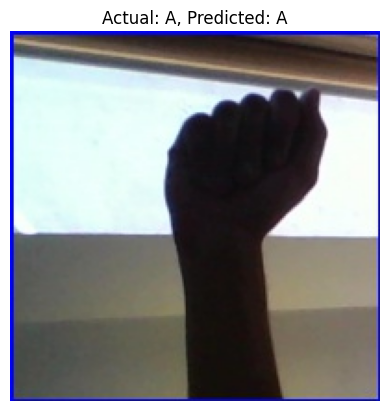

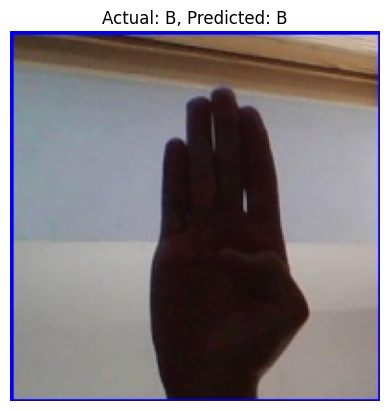

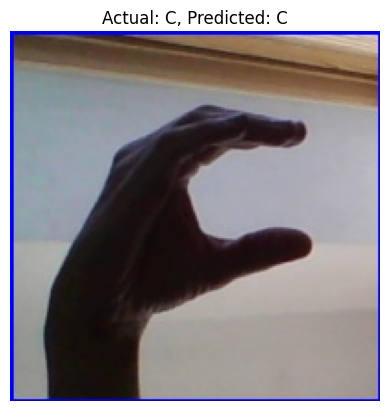

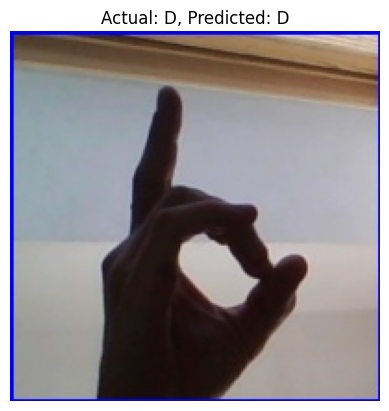

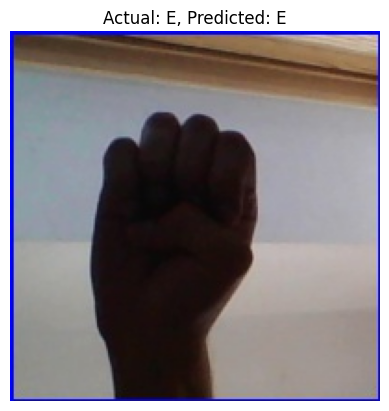

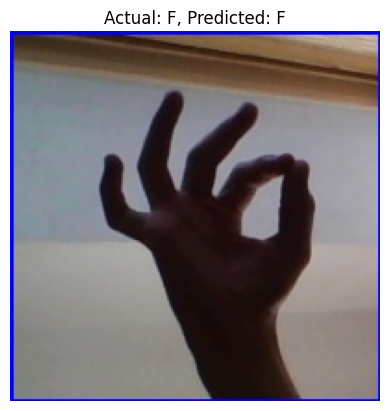

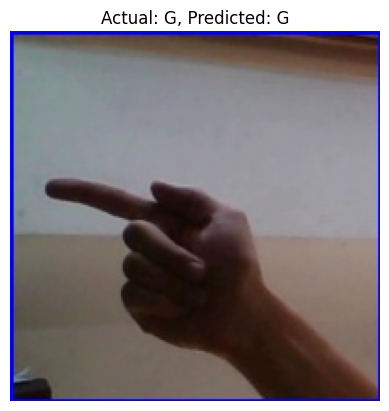

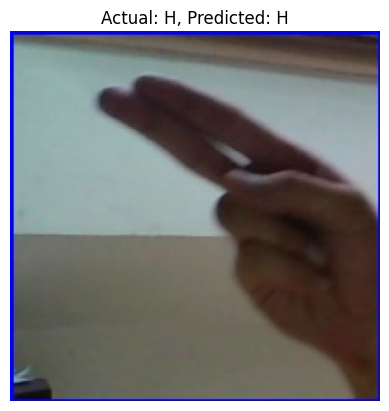

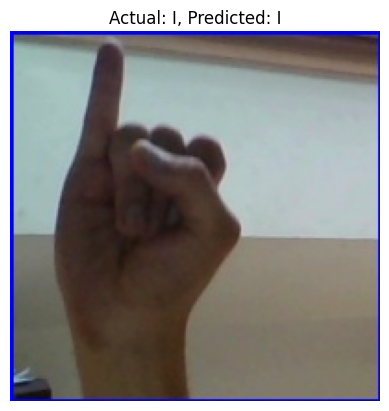

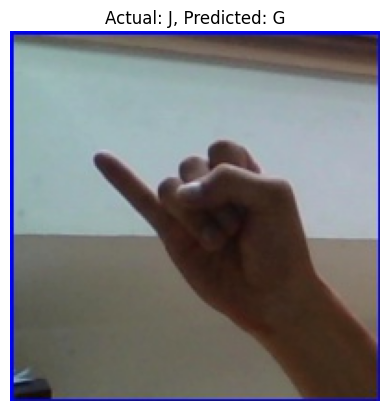

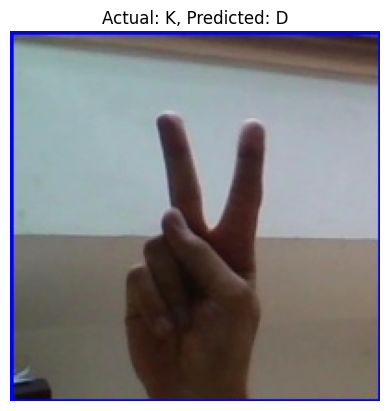

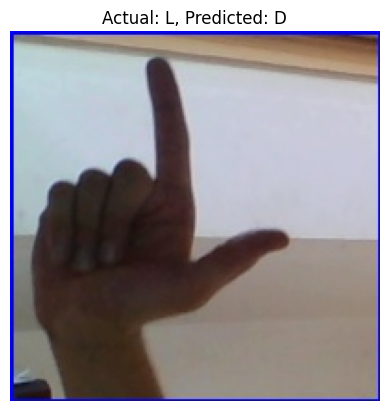

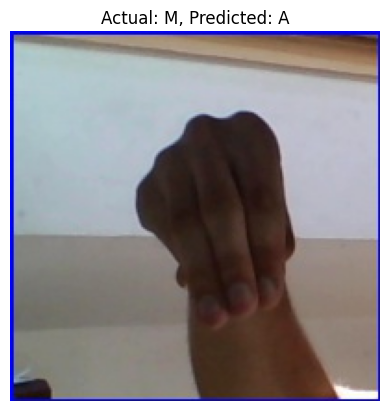

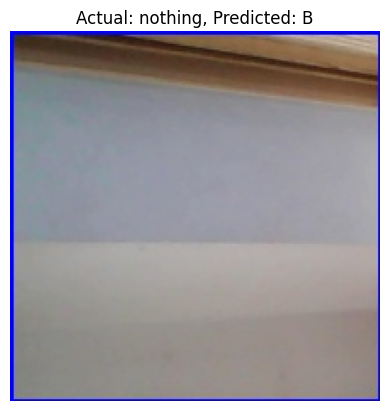

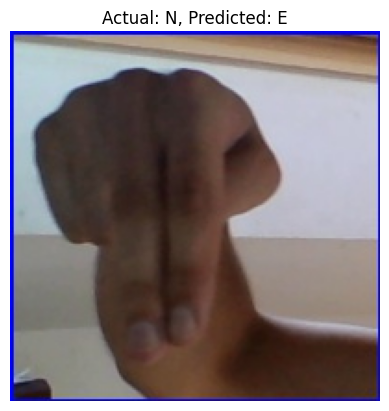

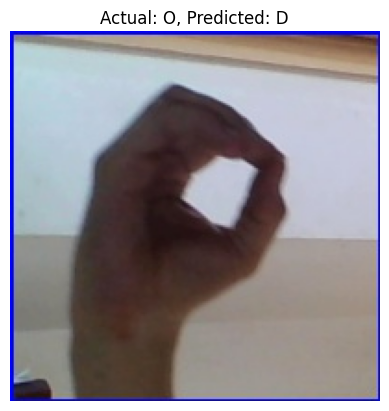

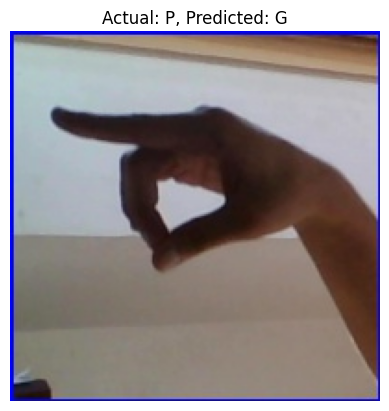

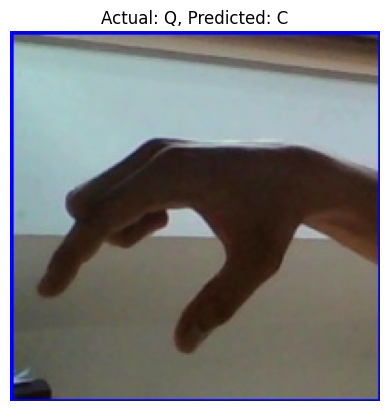

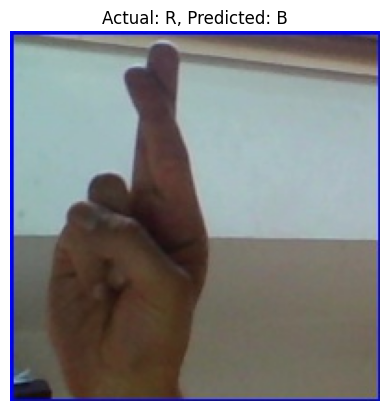

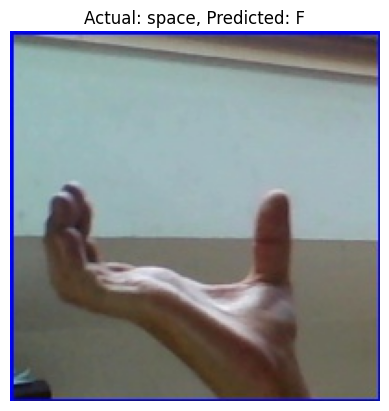

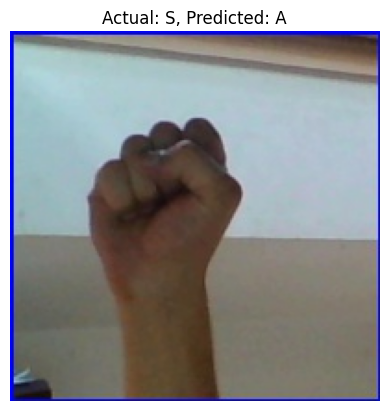

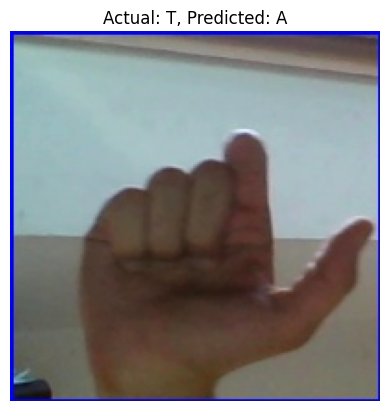

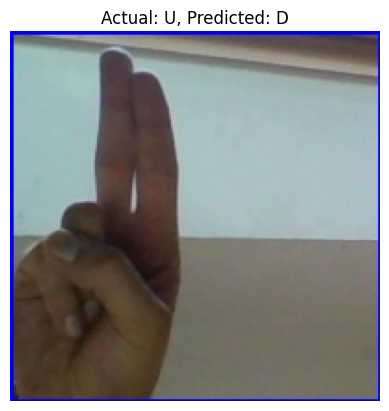

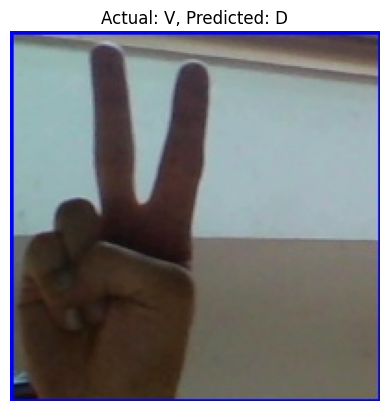

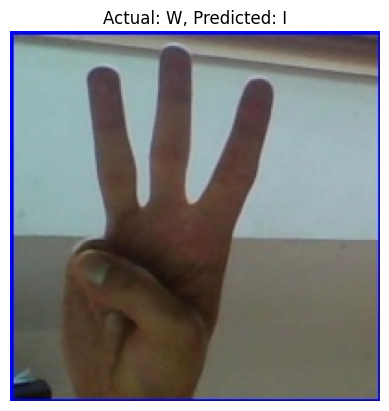

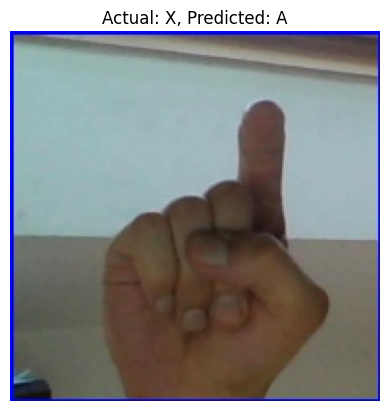

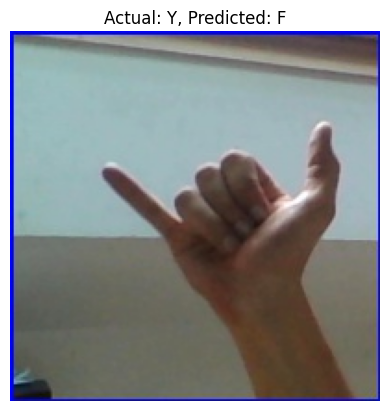

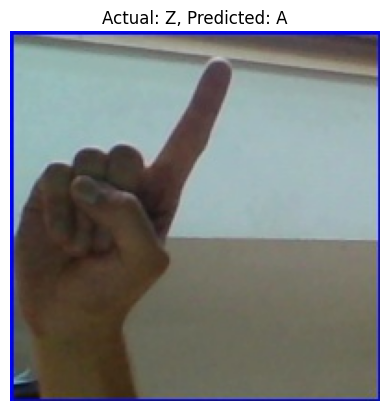

In [23]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Path to the folder containing test images of letters A to Z
test_folder_path = './asl_alphabet_test/asl_alphabet_test'  # Update to your test folder path

# Function to predict sign language gestures for all images in a folder
def predict_sign_language_for_folder(folder_path, model, categories):
    predictions = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):  # Ensure we only process image files
            image_path = os.path.join(folder_path, filename)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (64, 64))
            img = np.array([img]) / 255.0
            prediction = model.predict(img)
            predicted_category = categories[np.argmax(prediction)]
            predictions.append((image_path, predicted_category))

    return predictions

# Make predictions for all images in the test folder
folder_predictions = predict_sign_language_for_folder(test_folder_path, model, categories)

# Plot images along with actual and predicted classes
for image_path, predicted_sign in folder_predictions:
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib
    actual_sign = image_path.split(os.path.sep)[-1].split('_')[0]
    
    plt.figure()
    plt.imshow(img)
    plt.title(f"Actual: {actual_sign}, Predicted: {predicted_sign}")
    plt.axis('off')
    plt.show()
